# Capstone Design Project: Predicting if a Reddit Meme Will Go Viral

David M. Arnold<br> 
Orion99DA@gmail.com<br>
BrainStation Data Science Candidate<br>
Winter Cohort 2021<br>

**Workbook #3<br>**

This project is based on a dataset of collected Reddit memes that is shared on Kaggle.com.  Memes play an important role in social media platforms like Facebook, Twitter, Reddit and 4Chan and are shared by all types of users. I wanted to explore this data to determine if Machine Learning algorithms and Image Classification models could accurate predict what memes were actually popular in the Reddit social media platform, based on the amount of up votes and down votes each of these memes received.

While this project is meant to be a technical study of what factors may or may not contribute to a meme's popularity on Reddit, there are user names, comments and even the memes themselves that people reviewing this project may find vulgar and offensive.  

Please note that this project will be divided into several workbooks that will review and clean the data, transform the data into usable forms, perform the machine learning process on the data and perform image classification on the meme images.

**Workbook Overview**

The all numeric dataframe has been divided into Train, Validation and Test dataframes in the prior workbook.  These files will be imported into this workbook so the process of training and testing the machine learning algorithms can take place.  

Each machine learning algorithm will be trained and fine tuned using scale, dimensionality reduction and the varying the hyper-parameters of each model.  Once the model has been fine tuned for optimal performance and accuracy, the model can then be introduced to the test dataframe and scored.  

In additional each model will be evaluated using a confusion matrix as well as a measurement of the model precision and recall.   

### 3.1 Loading Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Plotting and Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To develop Train and Test data
from sklearn.model_selection import train_test_split

# For scaling data features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# ML algorithm models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Model evaluation tools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Now we can read in the Train, Validation and Test dataframes for both X and y.  These were split performing a Train-Validation-Test split in the preceding workbook.  

#### 3.1.1 Read in the Train, Validation and Test Datafiles

In [2]:
# Importing the dataframes from the last workbook

X_train = pd.read_csv('csv/X_train_1.csv', index_col=0)
y_train = pd.read_csv('csv/y_train.csv', index_col=0)
X_validation = pd.read_csv('csv/X_validation_1.csv', index_col=0)
y_validation = pd.read_csv('csv/y_validation.csv', index_col=0)
X_test = pd.read_csv('csv/X_test_1.csv', index_col=0)
y_test = pd.read_csv('csv/y_test.csv', index_col=0)

# Review the shape of each dataframe

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(1806, 681)
(1806, 1)
(774, 681)
(774, 1)
(646, 681)
(646, 1)


Note that the dataframes are already split into Train, Validation and Test sets already from workbook #2.

**View the Datasets**

In [3]:
# Look at the training dataset

X_train.head(1)

,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels,absolutely,accurate,...,xd,ya,ye,yeah,year.1,years,yes,young,youtube,zucc
0,2017,12,6,2,0,4,1,18900,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Look at the validation dataset

X_validation.head(1)

,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels,absolutely,accurate,...,xd,ya,ye,yeah,year.1,years,yes,young,youtube,zucc
0,2017,11,21,1,0,1,0,19600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Look at the test dataset

X_test.head(1)

,year,month,day,weekday,weekend,post_counts,frequent_poster,thumbnail_pixels,absolutely,accurate,...,xd,ya,ye,yeah,year.1,years,yes,young,youtube,zucc
0,2017,12,27,2,0,1,0,19600,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Data Preprocessing

There are several types of scalers that can be used when scaling data for machine learning.  The function of scaling the data is to put all the different types of data on to a level playing field for the model.  For example, you may have columns with very large numbers such as populations, counts or salaries.  Other columns of data may be smaller values such as weight, height, age or even columns of 0's and 1's.   

The scaled data will be handled much better by the machine learning models and allow them to perform and predict between without as much data "noise".

The scaler I decided to use for this process is the MinMax Scaler.  This scaler will take all the numerical values and set them to a range of 0 to 1.  The thumbnail pixel area column has values that range from 10,000 to 20,000 pixels.  Once these are scaled, they will look like 0.1 to 0.2.  The actual values remain the same in the dataframe columns, these values are scaled and transformed into arrays in the next section.

Refer to this article for more information on scaling data: 
https://kanoki.org/2020/06/01/sklearn-data-pre-processing-using-standard-and-minmax-scaler/#:~:text=Minmax%20scaler%20scales%20the%20features%20to%20a%20specific,that%20the%20data%20is%20already%20centered%20to%20Zero

#### 3.2.1 Scaling the Data

In [6]:
# Instantiate the Training data using MinMax Scaler
MinMax_scaler = MinMaxScaler().fit(X_train)

# Transform the Training data with the scaler
X_train_mm = MinMax_scaler.transform(X_train)

# Transform the Validation data with the scaler
X_validation_mm = MinMax_scaler.transform(X_validation)

# Transform the Testing data with the scaler
X_test_mm = MinMax_scaler.transform(X_test)

In [7]:
# Looking at the scaled data of the Training set

X_train_mm

array([[0.75      , 1.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.43333333, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.18181818, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75      , 0.81818182, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.09090909, 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.18181818, 0.36666667, ..., 0.        , 0.        ,
        0.        ]])

As you can see that all values in the data have been scaled down to value between 0 and 1.  Even values that were very high before, such as the pixel area for the thumbnail images have been scaled down to values between 0 and 1.

Now that we have setup our scaled Train, Validation and Test dataframes we can move on to training our machine learning algorithms to determine which one will most accurately determine a "Good" meme vs a "Not Good" meme from what they learn from the data.

### 3.3 Logistic Regression Model

The logistic regression model is a statistical machine learning model that is used for predictive analysis of relationships for categorical or binary variables, yes/no, has cancer/does not have cancer, male/female, etc.  Regression is predictive model used to find these relationships between the dependent variable or target and all the other independent variables or features.  

Logistic regression can be used in several ways: forecasting effects or impacts of specific chages, forecasting trends and predicting future outcomes, or determining the strength of predictors. 

There is additional information about Logistic Regression here:

https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/

#### 3.3.1 Initial Log-Reg Model

This initial model will test a range of C-value coefficients and determine the train and validation accuracy scores.  This will use the scaled data using the MinMax Scaler values.

**Make Training and Testing Datasets for the Logistic Regression model.**

The purpose of setting up these dataframes is to ensure that the dataframe is the same dataframe as the ones that have been scaled using the MinMax Scaler, but that these dataframes will only be trained and tested on the Logistic Regression model. 

In [8]:
# Make dataframe for Logistic Regression X_train

X_train_log = X_train_mm
X_validation_log = X_validation_mm
X_test_log = X_test_mm

Let's ensure that the created Logistic Regression dataframes have the same dataframe shape as the ones that have been scales using the MinMax Scaler.

In [9]:
#  Checking the shape of all the train, validation and test dataframes

print(f'The X_train_mm shape is: {X_train_mm.shape}')
print(f'The X_train_log shape is: {X_train_log.shape}')
print(f'The X_validation_mm shape is: {X_validation_mm.shape}')
print(f'The X_validation_log shape is: {X_validation_log.shape}')
print(f'The X_test_mm shape is : {X_test_mm.shape}')
print(f'The X_test_log shape is: {X_test_log.shape}')

The X_train_mm shape is: (1806, 681)
The X_train_log shape is: (1806, 681)
The X_validation_mm shape is: (774, 681)
The X_validation_log shape is: (774, 681)
The X_test_mm shape is : (646, 681)
The X_test_log shape is: (646, 681)


There, now we have verified the dataframes are all the same shape.

In [10]:
%%time
# List of varying C-values to use
C_values = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Accuracy score lists

df_train_logit = []
df_validation_logit = []

# Loop for running the C-values
for C in C_values:

    # Instantiate the training model
    # The 'lbfgs' solver helps to limit the computer resources used
    log_train = LogisticRegression(C=C, solver='lbfgs', max_iter=1000)

    # Fit the training model
    log_train.fit(X_train_log, y_train)

    # Score the training model
    df_train_logit.append(log_train.score(X_train_log, y_train))
    df_validation_logit.append(log_train.score(X_validation_log, y_validation))

Wall time: 2.19 s


Now that we have trained our Train and Validation datasets, we can review the accuracy results of the trained model.

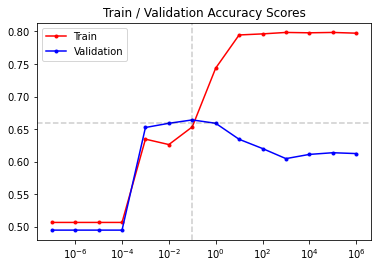

In [11]:
# Plotting the model results

plt.figure()
plt.plot(C_values, df_train_logit, c='red', label='Train', marker='.')
plt.plot(C_values, df_validation_logit, c='blue', label='Validation', marker='.')
plt.xscale('log')
plt.title("Train / Validation Accuracy Scores")
plt.axvline(0.1, color='black', linestyle='--', alpha=0.2)
plt.axhline(.66, color='black', linestyle='--', alpha=0.2)
plt.legend()
plt.show()

Reviewing the accuracy scores for the range of C values for both the Train and Validation data, we see that both sets start around ~50% accuracy and then rise up once C = 0.001.  Where they are closest is when C = 0.1, which is ~65% accurate.  After that point, the accuracy for the Validation data decreases to 60% and levels off, the accuracy for the Training data increases to ~80% and levels off.  This is a sign of overfitting to the training data, which is essentially it responds well to data similar to the training data and rejects any unrecognized data, so it scores poorly.  By choosing the C = 0.1 value where both the Training and Validation data are closest, we can expect the model to accurately predict a "Good" meme ~65% of the time when we introduce it to the Test data set.

#### 3.3.2 PCA Principle Component Reduction

We can also trying using Dimensionality Reduction or Principle Component Reduction, known as "PCA".  This essentially looks at all the feature columns we are using to train our machine learning models, finds the features that the model can use to draw the best relationships to the target and removes the unnecessary columns from the training process.  This removes a lot of "background noise" from the equation and allows the model focus really one which features have the greatest impact on the prediction of a Good meme or not a Good meme.


In [12]:
# Dimension reduction with PCA to determine the best number of components to use
train_PCA = PCA(n_components=681)

# Fitting to the PCA model
X_train_pca = train_PCA.fit(X_train_log)

These plots using all 681 components or features will help use determine how many features we actually need to accurately train the model.  

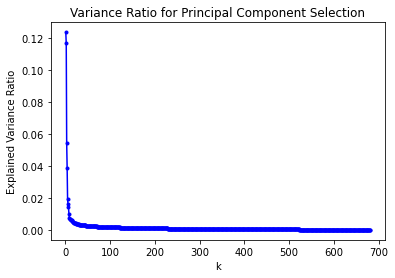

In [13]:
# The elbow plot method of selecting the number of n_components

plt.figure()
plt.plot(range(1, 682), train_PCA.explained_variance_ratio_, c='blue')
plt.scatter(range(1, 682), train_PCA.explained_variance_ratio_, c='blue', marker='.')
plt.title("Variance Ratio for Principal Component Selection")
plt.xlabel("k")
plt.ylabel("Explained Variance Ratio")
plt.show()

For choosing the value for 'k' on the elbow plot is based on the inflection point on the line where the slopes change angle.  Since there are so many values on the plot, it is hard to accurately choose a suitable 'k' value, but the general region is around 0-10.  We can reduce the overall amount and re-plot to make a better determination.

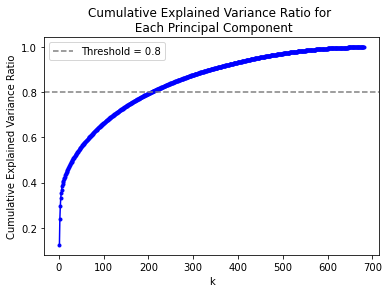

In [14]:
# Cumulative Sum method of choosing n_components

explained_variance = train_PCA.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(range(1, 682), explained_variance, marker=".", c='blue')
plt.axhline(0.8, linestyle='dashed', color="gray", label="Threshold = 0.8")
plt.title(
    "Cumulative Explained Variance Ratio for \n Each Principal Component")
plt.xlabel("k")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.legend()
plt.show()

By choosing ~80% of the explained variance, we get a value around 200 features, much different than the plot above.  Let's re-run this using fewer features.

In [15]:
# Dimension reduction with PCA to determine the best number of components to use
train_PCA2 = PCA(n_components=50)
X_train_pca2 = train_PCA2.fit(X_train_mm)

I chose to run these again using 50 features to make the plots more legible. 

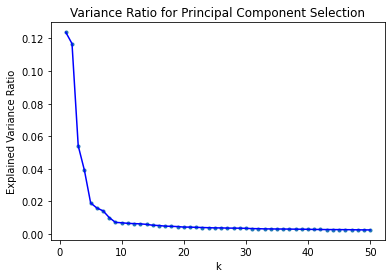

In [16]:
# The elbow plot method of selecting the number of n_components

plt.figure()
plt.plot(range(1, 51), train_PCA2.explained_variance_ratio_, c='blue')
plt.scatter(range(1, 51), train_PCA2.explained_variance_ratio_, marker='.')
plt.title("Variance Ratio for Principal Component Selection")
plt.xlabel("k")
plt.ylabel("Explained Variance Ratio")
plt.show()

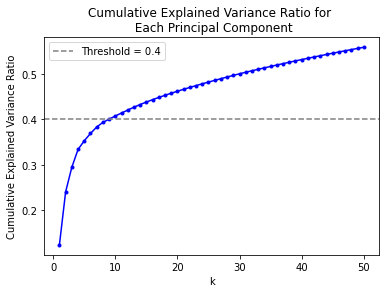

In [17]:
# Cumulative Sum method of choosing n_components

explained_variance2 = train_PCA2.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(range(1, 51), explained_variance2, marker=".", c='blue')
plt.axhline(0.4, linestyle='dashed', color="gray", label="Threshold = 0.4")
plt.title(
    "Cumulative Explained Variance Ratio for \n Each Principal Component")
plt.xlabel("k")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.legend()
plt.show()

Both plots seem to indicate that choosing 10 features to be the optimal 'k' value for the number of features to use for training the machine learning model.  We will use that and re-train our model.

#### 3.3.3 Re-train Model with PCA

In [18]:
# Use dimension reduction with 10 components
pca2 = PCA(n_components=10)
pca2.fit(X_train_log)
X_train_pca2 = pca2.transform(X_train_log)

# Fit the model with 'lbfgs'
logit_lbfgs = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000)
logit_model = logit_lbfgs.fit(X_train_log, y_train)

print(
    f'The accuracy score of the Training model is: {logit_model.score(X_train_log, y_train)}'
)

X_validation_pca2 = pca2.transform(X_validation_log)

print(
    f'The accuracy score of the Validation model is: {logit_model.score(X_validation_log, y_validation)}'
)

The accuracy score of the Training model is: 0.6533776301218162
The accuracy score of the Validation model is: 0.6640826873385013


We achieve an accuracy score around ~65% for the Training model and ~66% for the Validation model.  Very much in line with our scores that we achieved earlier.   Now let's test the model on our reserved Test dataset.

#### 3.3.4 Test the Logistics Regression Model

In [19]:
# Use dimension reduction with 10 components
pca2 = PCA(n_components=10)
pca2.fit(X_train_log)
X_train_pca2 = pca2.transform(X_train_log)

# Fit the model with 'lbfgs'
logit_lbfgs = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000)
logit_model = logit_lbfgs.fit(X_train_log, y_train)

print(
    f'The accuracy score of the Training model is: {logit_model.score(X_train_log, y_train)}'
)

X_validation_pca2 = pca2.transform(X_validation_log)
print(
    f'The accuracy score of the Validation model is: {logit_model.score(X_validation_log, y_validation)}'
)
X_test_pca2 = pca2.transform(X_test_log)
print(
    f'The accuracy score of the Testing model is: {logit_model.score(X_test_log, y_test)}'
)

The accuracy score of the Training model is: 0.6533776301218162
The accuracy score of the Validation model is: 0.6640826873385013
The accuracy score of the Testing model is: 0.6563467492260062


We can see from the results that the Training and Testing models scores ~65.5% accuracy when predicted whether a meme will be scored a "Good" meme or "Not a Good" meme based on the ML model.  This is similar to our results from the Training and Validation dataframes.

#### 3.3.5 Log-Reg Confusion Matrix

A confusion matrix is a way of measuring the accuracy of a machine learning model.  In this project we are training the model to learn from the features provided in order to either accurately predict whether or not a meme is a "Good" meme or a "Bad" meme based upon the features and how many votes that meme received.  The scoring was then changed to either a '0' for a meme that received less than 24,000 up votes and a '1' for meme that received more than 24,000 upvotes.  

The model is trained on the training dataset and and then we validate it's performance on the validation data.  Once we have fine-tuned the parameters training the model, we can then test the trained model on the testing data.  The confusion matrix is a table that provides the results of the model accuracy and how accurate it is scoring or predicting both the bad memes and the good memes.  The model lists how many bad memes it scored correctly, True Negative (TF).  Also it has a value for how many bad memes the model scored incorrectly, False Negative (FN).  These were memes that were actually bad memes that the model considered to be "good memes".   Conversely the matrix also provides the accuracy for good memes, True Positive (TP) and False Positive (FP).  These are the results of the model correctly predicting a good meme and the model incorrectly predicting a good meme.  


**True Negative (TN)**: Correctly predict $x$'s membership in the negative class (0)<br>
**False Negative (FN)**: Incorrectly predict $x$'s membership in the negative class (0)<br>
**True Positive (TP)**: Correctly predict that $x$ belongs to the positive class (1)<br>
**False Positive (FP)**: Incorrectly predict that $x$  belongs to the positive class (1)<br>



|      |  Predicted "Bad" - 0 |   Predicted "Good" - 1 | 
| --------- |:---:|:---:|
|True Bad - 0|**TN** | **FP** | 
|True Good - 1|**FN** |**TP** | 

**Accuracy:**

$$Accuracy = \frac{TN+TP}{TN+FP+FN+TP}$$

Here is a visual representation:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Precision-vs-Recall.jpg" width = 400/>

https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Precision-vs-Recall.jpg

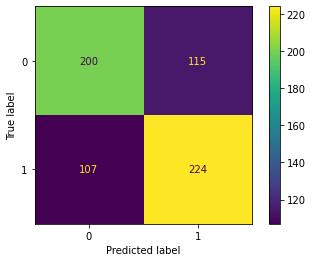

In [20]:
# Get class predictions
y_pred_log = logit_model.predict(X_test_log)

# Generate confusion matrix
cf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Plot
ConfusionMatrixDisplay(cf_matrix_log).plot()
plt.show()

Ideally for each of the confusion matrices what we want to see is that the top left box and the bottom right boxes have the highest values.  The top right box and the bottom left box should have the lowest values possible.  Since the number of "Bad" memes and "Good" memes are relatively equally split, if the model is very accurate, the top left and bottom right boxes will have the highest outcomes.  


Now we can evaluate the Test data results from the confusion matrix for the Logistic Regression trained model.

|     |  Predicted Bad Meme  |   Predicted Good Meme  | 
| --------- |:---:|:---:|
|True Bad Meme |200 | 115 | 
|True Good Meme | 107 | 224 | 

Result Totals:
* **TN**: There were 200 "Bad Meme" posts correctly identified as a "Bad Meme".
* **FP**: There were 115 "Bad Meme" posts incorrectly classified as a "Good Meme".
* **FN**: There were 107 "Good Meme" posts incorrectly classified as a "Bad Meme".
* **TP**: There were 224 "Good Meme" posts correctly classified as a "Good Meme".


**Accuracy:**

$$Accuracy = \frac{200+224}{200+107+115+224}$$

The overall Accuracy of the model overall is ~65.6%.  

The model correctly identified 224 "Good Memes" out of a total of 331 total "Good Memes", an accuracy of ~67.7%.<br>
The model correctly identified 200 "Bad Memes" out of a total of 315 total "Bad Memes", an accuracy of ~63.5
7%.<br>

This shows that the model has a slightly higher chance of correctly identifying a "Good Meme" as apposed to a "Bad Meme" based on the trained model.

Now we can also measure the Precision and Recall of the model results.

#### 3.3.6 Precision and Recall


Precision is a ratio of the amount of True Positive values over all the Positive Values predicted, both True Positive and False Positive values.  The higher precision a model has, the more accurately it will correctly identify values belonging to the correct class. 

$$Precision = \frac{TP}{TP+FP}$$

Recall is a ratio of the amount of True Positive values over all the actual Positive Values, both the predicted True Positive values and the incorrectly predicted False Negative values.  Recall is also referred to as the model sensitivity.  It shows how many True Positive values correctly measured but also how many were missed.

$$Recall = \frac{TP}{TP+FN}$$



More information on Precision and Recall in Machine Learning: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

In [21]:
# Precision Score
print(precision_score(y_test, y_pred_log))

# Recall Score
print(recall_score(y_test, y_pred_log))

0.6607669616519174
0.676737160120846


This model has a Precision of ~66.1% and a Recall of ~67.7%.  In this case the model has a 66% chance of correctly identifying a "Good Meme" out of all the memes it identifies as a "Good Meme", which is the precision.  Additionally it has a 67.7% of identifying a "Good Meme" out of all the memes that were actually "Good Memes" and memes that were incorrectly identified as a "Bad Meme".

### 3.4 Decision Trees Model

The Decision Tree machine learning model is a type of classifier model.  The model is made of nodes that are a type of test.  The nodes lead to branches or outcomes of that test, is a person a male or a female, dog or a cat, etc.  The leaf nodes that are the last remaining nodes that predict the outcome of the preceding branches.

Here is an example decision tree:

<img src="https://s3.ap-south-1.amazonaws.com/techleer/252.jpg" width=400>

https://s3.ap-south-1.amazonaws.com/techleer/252.jpg

There are classification decision trees that deal with categorical data and regression decision trees that deal with continuous values such as age, weight or cost.   The model works by dividing or partitioning the data into subsets.  

Decision trees are useful because they are not computationally expensive compared to other ML models, readily interpretable and exclude unimportant components.  Decision trees are also a model that not effected by scaling or not scaling the data prior to teaching the model on your set of data.

Some disadvantages with using decision trees are that they a prone to overfit the data, develop bias towards splits that have more levels and even small changes in the data can have a large impact to the model.

Learn more about Decision Trees here: 
https://medium.com/swlh/decision-tree-classification-de64fc4d5aac


#### 3.4.1 Initial Decision Trees Model

This initial model will test a range of Depths and determine the Train and Validation accuracy scores.  The Decision Trees model is different from the Logistic Regression model in that it does not need to have scaled data, so the dataframes will not use the MinMax Scaler.

**Make Training and Testing Datasets for the Logistic Regression model.**

The purpose of setting up these dataframes is to ensure that the dataframe is the same dataframe as the ones that have been scaled using the MinMax Scaler, but that these dataframes will only be trained and tested on the Logistic Regression model. 

In [22]:
# Make dataframe for Decision Trees X_train

X_train_dt = X_train
X_validation_dt = X_validation
X_test_dt = X_test

Let's ensure that the created Decision Trees dataframes have the same dataframe shape as the ones that have been scales using the MinMax Scaler.

In [23]:
# Look at the shape of the train, validation and test dataframes

print(f'The X_train shape is: {X_train.shape}')
print(f'The X_train_dt shape is: {X_train_dt.shape}')
print(f'The X_validation shape is: {X_validation.shape}')
print(f'The X_validation_dt shape is: {X_validation_dt.shape}')
print(f'The X_test shape is : {X_test.shape}')
print(f'The X_test_dt shape is: {X_test_dt.shape}')

The X_train shape is: (1806, 681)
The X_train_dt shape is: (1806, 681)
The X_validation shape is: (774, 681)
The X_validation_dt shape is: (774, 681)
The X_test shape is : (646, 681)
The X_test_dt shape is: (646, 681)


Now we have our Train, Validation and Test dataframes setup based on the unscaled dataset.  Let's setup a training model with a range of depths to test to and look at the accuracy scores for the Train and Validation datasets.

#### 3.4.2 Train the Decision Trees Model and Determine Depths

In [24]:
%%time

# Setup a list of depth ranges for the model to train to
depths = list(range(1, 200, 5))

# Empty lists to append to

train_dtc = []
validation_dtc = []

# Loop through the depths

for max_depth in depths:

    # Instantiate the model
    DTC = DecisionTreeClassifier(max_depth=max_depth)

    # Fit the model
    DTC.fit(X_train_dt, y_train)

    # Score the model
    train_dtc.append(DTC.score(X_train_dt, y_train))
    validation_dtc.append(DTC.score(X_validation_dt, y_validation))

Wall time: 1.88 s


Now that we have trained our Train and Validation datasets, we can review the accuracy results of the trained model.

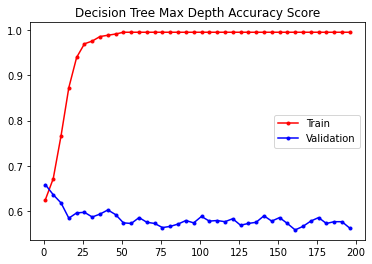

In [25]:
# Plotting the accuracies
plt.figure()
plt.plot(depths, train_dtc, c='red', label='Train', marker='.')
plt.plot(depths, validation_dtc, c='blue', label='Validation', marker='.')
plt.title('Decision Tree Max Depth Accuracy Score')
plt.legend()
plt.show()

We see that the Decision Tree depths begin to increase and overfit for the training data around a depth of 20 and the validation data decreases and levels off.  Overfitting is common for Decision Trees.  Perhaps the initial range of was to large, but this was just a test.  We can narrow this down and find a depth that is suitable for both the training and validation data.

In [26]:
%%time

depths = list(range(1, 25, 1))

# Empty lists to append to

train_dtc2 = []
validation_dtc2 = []

# Loop through the depths

for max_depth in depths:

    # Instantiate the model
    DTC = DecisionTreeClassifier(max_depth=max_depth)

    # Fit the model
    DTC.fit(X_train_dt, y_train)

    # Score the model
    train_dtc2.append(DTC.score(X_train_dt, y_train))
    validation_dtc2.append(DTC.score(X_validation_dt, y_validation))


Wall time: 1.12 s


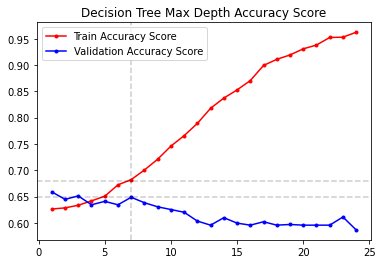

In [27]:
# Plotting the accuracies
plt.figure()
plt.plot(depths, train_dtc2, c='red', label='Train Accuracy Score', marker='.')
plt.plot(depths, validation_dtc2, c='blue', label='Validation Accuracy Score', marker='.')
plt.title('Decision Tree Max Depth Accuracy Score')
plt.axvline(7, color='black', linestyle='--', alpha=0.2)
plt.axhline(.68, color='black', linestyle='--', alpha=0.2)
plt.axhline(.65, color='black', linestyle='--', alpha=0.2)
plt.legend()
plt.show()

The depths value that where the Train and Validation data seem to be close and a high value for the Validation data is a depth of 7.  At this point the accuracy for the Training data is 68% and the Validation data is 65% accurate. This value for the depths can be used to for the Test dataset against the trained model.

#### 3.4.3 Test the Decision Trees Model

In [28]:
# Instantiate the model
DT_max = DecisionTreeClassifier(max_depth=7)

# Fit the model
DT_max.fit(X_train_dt, y_train)

# Score the model
print(
    f'The accuracy score for the Training Data is: {DT_max.score(X_train_dt, y_train)}'
)
print(
    f'The accuracy score for the Validation Data is: {DT_max.score(X_validation_dt, y_validation)}'
)
print(
    f'The accuracy score for the Testing Data is: {DT_max.score(X_test_dt, y_test)}'
)

The accuracy score for the Training Data is: 0.6821705426356589
The accuracy score for the Validation Data is: 0.6511627906976745
The accuracy score for the Testing Data is: 0.6501547987616099


Similar to the Train/Validation results, the results of the Test dataset achieves an accuracy of ~65% for predicting a "Good" meme vs a "Not Good" meme.  

#### 3.4.5 Decision Trees Confusion Matrix

Talk about Confusion matrix here

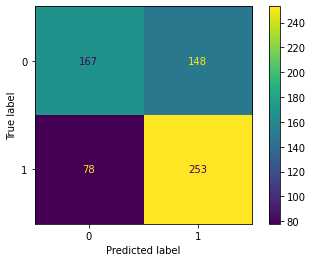

In [29]:
# Get class predictions
y_pred_dt = DT_max.predict(X_test_dt)

# Generate confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot
ConfusionMatrixDisplay(cf_matrix_dt).plot()
plt.show()

Now we can evaluate the Test data results from the confusion matrix for the Decision Trees trained model.

|     |  Predicted Bad Meme  |   Predicted Good Meme  | 
| --------- |:---:|:---:|
|True Bad Meme |168 | 147 | 
|True Good Meme | 78 | 253 | 

Result Totals:
* **TN**: There were 168 "Bad Meme" posts correctly identified as a "Bad Meme".
* **FP**: There were 147 "Bad Meme" posts incorrectly classified as a "Good Meme".
* **FN**: There were 78 "Good Meme" posts incorrectly classified as a "Bad Meme".
* **TP**: There were 253 "Good Meme" posts correctly classified as a "Good Meme".


**Accuracy:**

$$Accuracy = \frac{168+253}{168+147+78+253}$$

The overall Accuracy of the model overall is ~65.2%.  

The model correctly identified 253 "Good Memes" out of a total of 331 total "Good Memes", an accuracy of ~76.4%.<br>
The model correctly identified 168 "Bad Memes" out of a total of 315 total "Bad Memes", an accuracy of ~53.3%.<br>

This shows that the model has a significantly higher accuracy of correctly identifying a "Good Meme" as apposed to a "Bad Meme" based on the trained model.

Now we can also measure the Precision and Recall of the model results.

#### 3.4.6 Precision and Recall



In [30]:
# Precision Score
print(precision_score(y_test, y_pred_dt))

# Recall Score
print(recall_score(y_test, y_pred_dt))

0.6309226932668329
0.7643504531722054


This model has a Precision of ~63.3% and a Recall of ~76.4%.  Therefore the model has a 63% chance of correctly identifying a "Good Meme" out of all the memes it identifies as a "Good Meme", which is the precision.  Additionally it has a 76% of identifying a "Good Meme" out of all the memes that were actually "Good Memes" and memes that were incorrectly identified as a "Bad Meme".

### 3.5 K-Nearest Neighbors Model

K-Nearest Neighbors or KNN, is a machine learning algorithm that is used for classification.  The model examines the name or label of a data point from a dataset and compares it to surrounding data points from the dataset to make a prediction about the class or group that the data point belongs to.

KNN is used to calculate the similarity be measuring the distance between points.  First you set a K value which is the size of the collection of neighbors that the data point should be compared to.  Calculate the distance from the data point to these other points.  Find the labels of these data points and then return a relationship prediction about these test data.

KNN can be used for classification and regression, is accurate and interpretable and understandable.  The drawbacks of the model are that the computations are expensive when compared to other machine learning algorithms, the length of time to train a model are very lengthy, so if your dataset is very large this model might not be a good decision.  Additionally the model can be sensitive to the scale of the varying components of the data.  It is recommended that when using the model, to scale the data in preprocessing to avoid this issue.

More information about KNN is here:

https://www.unite.ai/what-is-k-nearest-neighbors/#:~:text=What%20is%20K-Nearest%20Neighbors%20(KNN)?%20K-Nearest%20Neighbors%20is,the%20class%20that%20the%20data%20point%20falls%20into.

#### 3.5.1 Initial KNN Model

This initial model will test a range of C-value coefficients and determine the train and validation accuracy scores.  This will use the scaled data using the MinMax Scaler values.

**Make Training and Testing Datasets for the KNN model.**

The purpose of setting up these dataframes is to ensure that the dataframe is the same dataframe as the ones that have been scaled using the MinMax Scaler, but that these dataframes will only be trained and tested on the K-Nearest Neighbors model. 

In [31]:
# Make dataframe for KNN X_train

X_train_knn = X_train_mm
X_validation_knn = X_validation_mm
X_test_knn = X_test_mm

Let's ensure that the created KNN dataframes have the same dataframe shape as the ones that have been scales using the MinMax Scaler.

In [32]:
# Looking at the shape of the dataframes

print(f'The X_train_mm shape is: {X_train_mm.shape}')
print(f'The X_train_knn shape is: {X_train_knn.shape}')
print(f'The X_validation_mm shape is: {X_validation_mm.shape}')
print(f'The X_validation_knn shape is: {X_validation_knn.shape}')
print(f'The X_test_mm shape is : {X_test_mm.shape}')
print(f'The X_test_knn shape is: {X_test_knn.shape}')

The X_train_mm shape is: (1806, 681)
The X_train_knn shape is: (1806, 681)
The X_validation_mm shape is: (774, 681)
The X_validation_knn shape is: (774, 681)
The X_test_mm shape is : (646, 681)
The X_test_knn shape is: (646, 681)


There, now we have verified the dataframes are all the same shape.

#### 3.5.2 Train the KNN Model

In [33]:
%%time

# Test a range of K values for the model.

train_scores = []
validation_scores = []

K_values = np.array([5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 300, 400])

for k in K_values:

    # Instantiate the model with the range of k values
    my_KNN = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training validation set
    my_KNN.fit(X_train_knn, y_train)

    # Score the training validation set
    train_scores.append(my_KNN.score(X_train_knn, y_train))

    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_knn, y_validation))

Wall time: 45.2 s


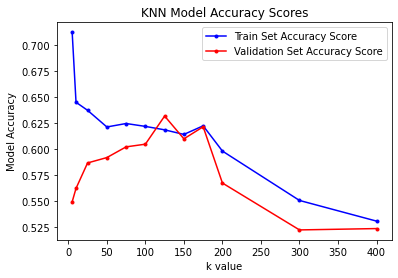

In [34]:
# Plotting the model results

plt.figure()
plt.plot(K_values, train_scores, label="Train Set Accuracy Score", marker='.', c='blue')
plt.plot(K_values,
         validation_scores,
         label="Validation Set Accuracy Score",
         marker='.', c='red')
plt.xscale('linear')
plt.xlabel('k value')
plt.ylabel('Model Accuracy')
plt.title('KNN Model Accuracy Scores')
plt.legend()
plt.show()

The Train and Validation values seem to grow together in the 'k' values 50-175 and then they decrease in accuracy.  Let's repeat this test using a narrower range to decide on an optimal 'k' value.

In [35]:
%%time
# Test a range of K values for the model.

validation_scores = []
train_scores = []

K_values = list(range(50, 175, 2))

for k in K_values:

    # Instantiate the model with the range of k values
    my_KNN = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training validation set
    my_KNN.fit(X_train_mm, y_train)

    # Score the training validation set
    train_scores.append(my_KNN.score(X_train_mm, y_train))

    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_mm, y_validation))

Wall time: 4min 16s


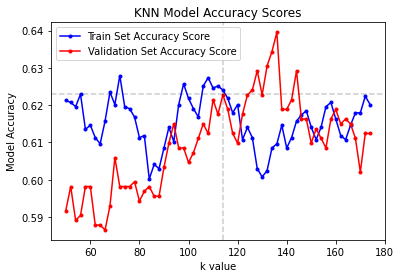

In [36]:
# Plotting the model results

plt.figure()
plt.plot(K_values, train_scores, label="Train Set Accuracy Score", marker='.', c='blue')
plt.plot(K_values,
         validation_scores,
         label="Validation Set Accuracy Score",
         marker='.', c='red')
plt.xscale('linear')
plt.xlabel('k value')
plt.ylabel('Model Accuracy')
plt.title('KNN Model Accuracy Scores')
plt.axvline(114, color='black', linestyle='--', alpha=0.2)
plt.axhline(.623, color='black', linestyle='--', alpha=0.2)
plt.legend()
plt.show()

The suitable 'k' value to choose is 114 neighbors.  This is where the Train and Validation datasets are closest and at peak values.  At this point the accuracy score is ~62.3% accurate on making predictions for if a meme is a "Good" meme vs a "Not a Good" meme. Now the trained model can be used on the Test dataset to determine the accuracy.

#### 3.5.3 Test the KNN Model

In [37]:
# Instantiate the model
KNN_model = KNeighborsClassifier(n_neighbors=114)

# Fit the model
KNN_model.fit(X_train_knn, y_train)

# Score the model
print(
    f'The accuracy score for the Training Data is: {KNN_model.score(X_train_knn, y_train)}'
)
print(
    f'The accuracy score for the Testing Data is: {KNN_model.score(X_test_knn, y_test)}'
)

The accuracy score for the Training Data is: 0.624031007751938
The accuracy score for the Testing Data is: 0.5789473684210527


While the score of the Train dataset is ~62% as we saw in the graph above, the Test dataset actually scored lower at ~58% than the Validation datset at ~62%.  This could be due to differences between the Validation and Test datasets.  The results at 114 neighbors for the Test and Validation data both showed to be ideal at 114 neighbors.  It is possible that this is not the same when testing the trained model on the Test dataset.  We could repeat the same test using the Training dataset and the Testing dataset, which is not good practice, that is why we have the validation datset, but I am curious to see what the ideal number of neighbors is for the Testing data.

#### 3.5.4 Re-evaluating the Train and Test Results

In [38]:
%%time
# Test a range of K values for the model.

train_scores = []
test_scores = []

K_values = list(range(50, 175, 2))

for k in K_values:

    # Instantiate the model with the range of k values
    my_KNN = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training validation set
    my_KNN.fit(X_train_mm, y_train)

    # Score the training validation set
    train_scores.append(my_KNN.score(X_train_mm, y_train))

    # score on validation set
    test_scores.append(my_KNN.score(X_test_mm, y_test))

Wall time: 4min 21s


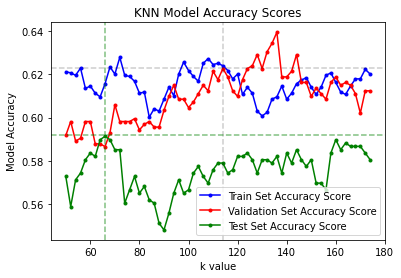

In [39]:
# Plotting the model results

plt.figure()
plt.plot(K_values, train_scores, label="Train Set Accuracy Score", marker='.', c='blue')
plt.plot(K_values,
         validation_scores,
         label="Validation Set Accuracy Score",
         marker='.', c='red')
plt.plot(K_values,
         test_scores,
         label="Test Set Accuracy Score",
         marker='.', c='green')
plt.xscale('linear')
plt.xlabel('k value')
plt.ylabel('Model Accuracy')
plt.title('KNN Model Accuracy Scores')
plt.axvline(114, color='black', linestyle='--', alpha=0.2)
plt.axhline(.623, color='black', linestyle='--', alpha=0.2)
plt.axvline(66, color='green', linestyle='--', alpha=0.5)
plt.axhline(.592, color='green', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Reviewing the results of the Train, Validation and the Test datasets using a range of a 'k' neighbor values sheds some light on the reason why the Test data did not perform as well as the Validation data.  The Test dataset was never even close with the Training dataset when it came to the KNN model.  The closest the values were a 'k' neighbors value of 66, and even then the accuracy for the Training data was ~61.5% and the Testing data was ~59.2%.  So there was obviously was a major difference between the datasets.

Now that we have the closest 'k' value for the Train and Test datasets, the Testing data can be used on the model and scored for accuracy.

In [40]:
# Instantiate the model
KNN_model = KNeighborsClassifier(n_neighbors=66)

# Fit the model
KNN_model.fit(X_train_knn, y_train)

# Score the model
print(
    f'The accuracy score for the Training Data is: {KNN_model.score(X_train_knn, y_train)}'
)
print(
    f'The accuracy score for the Validation Data is: {KNN_model.score(X_validation_knn, y_validation)}'
)
print(
    f'The accuracy score for the Testing Data is: {KNN_model.score(X_test_knn, y_test)}'
)

The accuracy score for the Training Data is: 0.6157253599114064
The accuracy score for the Validation Data is: 0.58656330749354
The accuracy score for the Testing Data is: 0.5913312693498453


The results of the ideal 'k' value of 66 neighbors for the Train and Test datasets. As mentioned earlier, it is between to perform all model training on the Training and Validation data before introducing the Test dataset to the model, but I was curious to see why the Test data performed lower when using the 'k' = 114 value for the test.  We could see that there is a significant shift between how the Train and Validation relate to each other compared to the Test data.  

#### 3.5.5 KNN Confusion Matrix

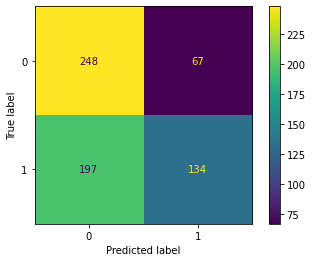

In [41]:
# Get class predictions
y_pred_knn =KNN_model.predict(X_test_knn)

# Generate confusion matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot
ConfusionMatrixDisplay(cf_matrix_knn).plot()
plt.show()

Now we can evaluate the Test data results from the confusion matrix for the KNN K-Nearest Neighbors trained model.

|     |  Predicted Bad Meme  |   Predicted Good Meme  | 
| --------- |:---:|:---:|
|True Bad Meme |248 | 67 | 
|True Good Meme | 197 | 134 | 

Result Totals:
* **TN**: There were 248 "Bad Meme" posts correctly identified as a "Bad Meme".
* **FP**: There were  67 "Bad Meme" posts incorrectly classified as a "Good Meme".
* **FN**: There were 197 "Good Meme" posts incorrectly classified as a "Bad Meme".
* **TP**: There were 134 "Good Meme" posts correctly classified as a "Good Meme".


**Accuracy:**

$$Accuracy = \frac{248+134}{248+67+197+134}$$

The overall Accuracy of the model overall is ~59.1%.  

The model correctly identified 134 "Good Memes" out of a total of 331 total "Good Memes", an accuracy of ~40.5%.<br>
The model correctly identified 248 "Bad Memes" out of a total of 315 total "Bad Memes", an accuracy of ~78.7%.<br>

The KNN model differed greatly from the Logistic Regression and the Decision Trees results.  The model seemed to heavily favor correctly identifying True Negative values as opposed to True Positive values. 

#### 3.5.6 Precision and Recall

In [42]:
# Precision Score
print(precision_score(y_test, y_pred_knn))

# Recall Score
print(recall_score(y_test, y_pred_knn))

0.6666666666666666
0.40483383685800606


This model has a Precision of ~66.7% and a Recall of ~40.5%.  Therefore the model has a 66.7% chance of correctly identifying a "Good Meme" out of all the memes it identifies as a "Good Meme", which is the precision.  Additionally it has a 40.5% of identifying a "Good Meme" out of all the memes that were actually "Good Memes" and memes that were incorrectly identified as a "Bad Meme".

### 3.6 Machine Learning Modeling Summary

Working with the Reddit Meme dataset from Kaggle has certainly been an interesting experience at determining if a set of Machine Learning algorithms would be capable of learning the relationships based on available data features in order to determine or predict if a meme on Reddit would become a popular, or highly up-voted meme.  

While the idea of addressing the popularity of memes on Reddit may seem like an odd topic at first glance, think about the world we live in today as far as how communication is conducted.  Five thousand years ago we were carving into rock and painting in caves.  A few hundred years ago, the first bound books were invented.  A little over a 100 years ago if you wanted to talk to someone hundred of miles away, you were tapping out a message in code and having it transcribed. Memes are the nothing more than images or short video files used to tell a joke, or express an opinion and they fit perfectly into the modern platform of instantaneous global communication.  But they are the preferred method of communication across many demographics and social platforms.  Even famous celebrities, politicians and even corporations use memes to communicate.  So why not investigate what will make them successful, if not for a laugh, sell a product or start a social movement?

The initial steps in the process was to review, clean-up and analyze the data to see what I was actually working with.  There were 2000+ memes from 2014-2018 with various data points: date posted, user name, title, link to the post, thumbnail image size, up-votes and down-votes.  The data all needed to be converted into a numerical form, and unnecessary data was discarded.   Once the data was in the correct form, I created a Train-Validation-Test split of the data, the Training data for training the machine learning algorithms and the Validation data for fine-tuning the hyper-parameters of each model.  The final step in the process using the Test data with trained model to score the accuracy of the model on a dataset that the model had never viewed before.  

The datasets used in training three machine learning algorithsm: Logistic Regression, Decision Trees Classifier and K-Nearest Neighbors (KNN).  They all had similar accuracy scores when it came to their ability to accurately predict what is a considered a "Good Meme" or a "Bad Meme".

Model Type          | Training Accuracy | Validation Accuracy | Testing Accuracy | 
--------------------|:-----------------:|:-------------------:|:----------------:|
Logistic Regression | 65.3              | 66.4                |  65.5            | 
Decision Trees      | 68.2              | 64.7                |  65.2            |
K-Nearest Neighbors | 61.6              | 58.7                |  59.1            |

The Logistic Regression model seems to have the most consistency between the Training, Validation and Testing datasets.  They're all in the mid-60's range of accuracy.  The Decision Trees model has the overall highest accuracy with the Training data, but the Testing data accuracy is on par with the Logistic Regression Model.  The KNN or K-Nearest Neighbors model has the lowest accuracy scores among the three of the machine learning models is this is for all three types of datasets.  As we saw earlier, the initial 'k' value was higher using 114 neighbors, but the performance on the Testing data was much lower than the Training and Validation data.  So a closer examination was performed and the ideal 'k' was discovered to by 66 neighbors.  

Overall if I were to choose a model that I feel would perform the best it would be the Logistic Regression model, possibly the Decision Trees model.  The Logistic model seems the most consistent overall with this set of data, but there is no harm in running the Decision Trees model on new data for comparison.

For reflection on the data and the success of the project, there are some things I would consider to possibly change or experiment with.  First would be the date range of the data used. As previously mentioned by reviewing the heat map of upvotes, days with posts and years.  The years 2014-2015 had very few posts, but the upvotes were much higher than other years.  This could be that there was much fewer posts and they have been around longer, so less content to review, may allow more users to vote on these posts.  For the years 2016-2018, there are much more posts with fewer upvotes.  We discussed this could be from users being banned from platforms like Twitter and Facebook during the election, so users migrated to Reddit.  This also means that there is a larger pool of posts or data.  So each people may have fewer and fewer people actually seeing the post, and fewer votes.  There is another possibility that maybe the tastes of the users changed, so fewer people actually found them upvote worthy. It is hard to say, but I would definitely test the models on just the 2014-2015 data and then test the data from 2016-2018 on the models.

Increasing the datapoints or number of posts would also be another consideration.  The study using only a couple thousand user posts may have impacted each of the algorithm's ability to learn from the sparse amount of data.  I had found some other collect of Reddit memes, but these were just the images themselves with no other data.  So it was lacking user names, dates posted, upvotes, etc.  If there was a dataset of memes from Reddit that included the necessary data, this will be beneficial for training and improving the accuracy of the models.

One last consideration for improving the model accuracy would be to use feature engineering.  This is the processing of evaluating your columns of data or features and joining two columns of data with respect to each other to create a new column of data, essentially a new feature.  There was some examples of feature engineering in the project, such as when the date posted column was broken into years, months, days and weekends, and also the binning of the users into one post users vs users with more than one post.   Potentially if other relationships between the data were pursued, that other feature engineering columns may have helped to improve accuracy.

This concludes the data based machine learning portion of the project.  The next workbook with focusing using Convolutional Neural Networks and image classification to determine if an algorithm can learn from the meme images themselves in order to predict if a meme image is a "Good Meme" or a "Bad Meme".

**End of Workbook 3:**<br>
Please continue with Workbook 4